In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler
 
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('final_output.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,5,2,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,5,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,5,2,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,5,2,1,4,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,12,3,2,0,2,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,11,5,2,1,2,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,13,5,1,0,3,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,13,5,3,0,2,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,10,5,2,1,3,10.0,0,0,0


In [3]:
X = df.iloc[:, 1:16]
y = df.iloc[:, 0]

In [4]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
0,16.60,1,0,0,3.0,30.0,0,0,8,5,1,1,4,5.0,1
1,20.34,0,0,1,0.0,0.0,0,0,13,5,2,1,4,7.0,0
2,26.58,1,0,0,20.0,30.0,0,1,10,5,1,1,2,8.0,1
3,24.21,0,0,0,0.0,0.0,0,0,12,5,2,0,3,6.0,0
4,23.71,0,0,0,28.0,0.0,1,0,5,5,2,1,4,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,9,4,1,0,2,6.0,1
319791,29.84,1,0,0,0.0,0.0,0,1,4,4,2,1,4,5.0,1
319792,24.24,0,0,0,0.0,0.0,0,0,6,4,2,1,3,6.0,0
319793,32.81,0,0,0,0.0,0.0,0,0,2,4,2,0,3,12.0,0


In [5]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [6]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [7]:
#scaling the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
#fit and train the model
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier = classifier.fit(X_train, y_train)

In [9]:
#accuracy check
y_pred = classifier.predict(X_test)
#accuracy = metrics.accuracy_score(y_test, y_pred)
#accuracy

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, y_pred, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division = 1))

C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:  0.9066198658515612
Recall:  0.13424231332357248
Precision: 0.3712984054669704
CL Report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95    116990
           1       0.37      0.13      0.20     10928

    accuracy                           0.91    127918
   macro avg       0.65      0.56      0.57    127918
weighted avg       0.88      0.91      0.89    127918



In [10]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[114506,   2484],
       [  9461,   1467]], dtype=int64)

In [14]:
#print(model_grid.best_estimator_)

In [15]:
#Hyperparameter tuning

#classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
#classifier = classifier.fit(X_train, y_train)

In [16]:
#accuracy check
#y_pred = classifier.predict(X_test)

#print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
#print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division = 1))
#print("Precision:", metrics.precision_score(y_test, y_pred, zero_division = 1))
#print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division = 1))

In [17]:
#confusion matrix
#cm1 = confusion_matrix(y_test, y_pred)
#cm1

In [11]:
df['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [12]:
#Taking care of imbalance in target variable

under_sample = RandomUnderSampler(sampling_strategy = 0.5)
X_resampled, y_resampled = under_sample.fit_resample(X_train, y_train)

In [13]:
knn_class = KNeighborsClassifier(n_neighbors = 15)
knn_class.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=15)

In [14]:
#accuracy check
y_pred = knn_class.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, y_pred, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division = 1))

C:\Users\rebzl\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:  0.8168201504088557
Recall:  0.5967240117130308
Precision: 0.2552650121349722
CL Report:               precision    recall  f1-score   support

           0       0.96      0.84      0.89    116990
           1       0.26      0.60      0.36     10928

    accuracy                           0.82    127918
   macro avg       0.61      0.72      0.63    127918
weighted avg       0.90      0.82      0.85    127918



In [15]:
#confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[97965, 19025],
       [ 4407,  6521]], dtype=int64)

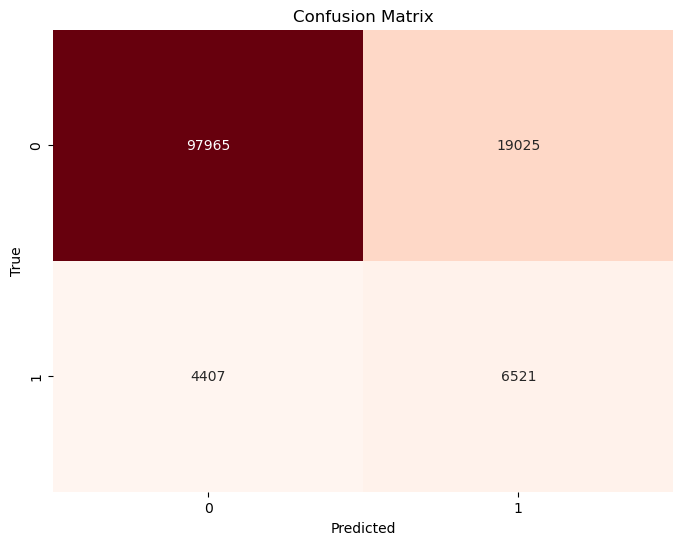

In [16]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm1, annot = True, fmt = 'd', cmap = 'Reds', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
#Hyperparameter tuning

#param_grid_knn = {
#    'n_neighbors': [2, 5, 10, 15],
 #   'algorithm' : ['ball_tree', 'kd_tree', 'brute', 'auto'],
  #  'metric' : ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
#}

In [18]:
#model_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid_knn, verbose = 1, cv = 10, n_jobs = -1)

In [19]:
#model_grid.fit(X_train, y_train)

In [21]:
import joblib

joblib.dump(knn_class, 'knn_model.joblib')

['knn_model.joblib']